In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Concatenate , Add, Dot, Activation
from tensorflow.keras.models import Model


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.python.client import device_lib
#tf.disable_v2_behavior()

#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__ )

Num GPUs Available:  1
2.9.1


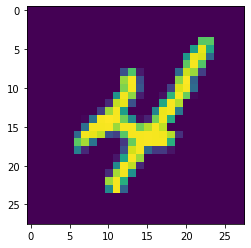

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

AssertionErrorx_train = np.expand_dims(x_train, -1)
x = x_train[9].reshape(1, 28,28,1)
plt.imshow(x[0])

In [4]:
from sa_decomp_layer import SADecompLayer

# Test SADecpmp module
print(x.shape)

'''model = keras.Sequential([
    
    keras.Input(shape=input_shape),
    SADecompLayer(w_size=4, name='sad1_1'),
    #SADecompLayer(w_size=28, name='sad2_1'),

    ])
#model.summary()
# Call model on a test input
#model = keras.Model(input, ys, name="encoder")
#model.summary()

sym = model(x)
print(sym.shape)
#asym = x - sym
plt.imshow( sym[0,:,:,0]  )'''




(1, 28, 28, 1)


'model = keras.Sequential([\n    \n    keras.Input(shape=input_shape),\n    SADecompLayer(w_size=4, name=\'sad1_1\'),\n    #SADecompLayer(w_size=28, name=\'sad2_1\'),\n\n    ])\n#model.summary()\n# Call model on a test input\n#model = keras.Model(input, ys, name="encoder")\n#model.summary()\n\nsym = model(x)\nprint(sym.shape)\n#asym = x - sym\nplt.imshow( sym[0,:,:,0]  )'

BEFORE:



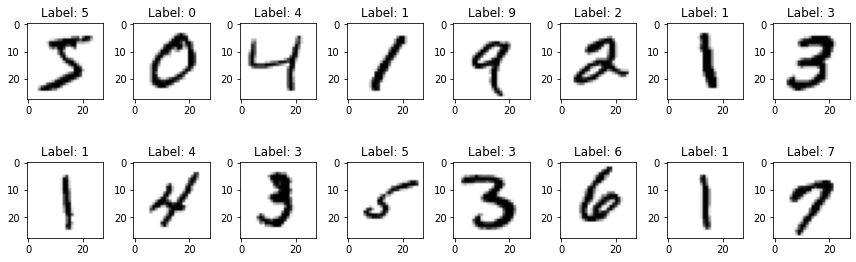

AFTER:



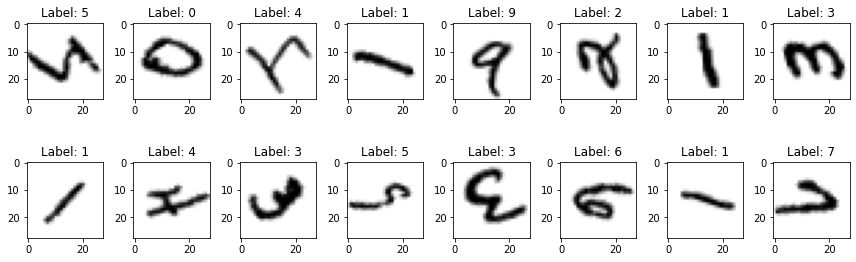

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# specify the maximum rotation_range angle
rotation_range_val = 180
# import relevant library
# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)
# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num = num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()


In [6]:
def rotateDataset(x, maxRot = 360, h=28, w=28, batch_size=100):
    datagen = ImageDataGenerator(rotation_range=maxRot)
    # fit the generator
    datagen.fit(x.reshape(x.shape[0], 28, 28, 1))
    out = datagen.flow(x.reshape(x.shape[0], h, w, 1), x.reshape(x.shape[0], h, w, 1), batch_size=batch_size)


    return  out

def rotateDatasetVal(x, maxRot = 360, h=28, w=28, batch_size=100):
    datagen = ImageDataGenerator(rotation_range=maxRot)
    # fit the generator
    x_orig = x.reshape(x.shape[0], 28, 28, 1)

    datagen.fit(x.reshape(x.shape[0], 28, 28, 1))
    out = datagen.flow(x.reshape(x.shape[0], h, w, 1), x_orig.reshape(x.shape[0], h, w, 1), batch_size=batch_size)


    return  out

In [7]:

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [49]:
input_net = Input(input_shape)


#y = layers.Conv2D(32, kernel_size=(3, 3), strides = (2,2),  padding='SAME', activation=None)(input_net)
#y = layers.Conv2D(64, kernel_size=(3, 3), strides = (2,2), padding='SAME', activation=None)(s)

y = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(input_net)
y = layers.MaxPooling2D(pool_size=(2, 2))(y) 

y = layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu')(y)
y = layers.MaxPooling2D(pool_size=(2, 2))(y) 

y = layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu')(y)

y = layers.Dense(7*7*64, activation='relu')(y)
y = layers.Dense(2, activation='relu')(y)
y = layers.Dense(7*7*64, activation='relu')(y)


y = layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(y)
y = layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='same', activation='relu')(y)






model = Model(inputs = input_net, outputs = y)
model.summary()

Model: "model_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 64)          369

In [50]:
batch_size = 128
epochs = 5
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer="adam", metrics=["mean_squared_error"])
model.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(rotateDataset(x_test)))

Epoch 1/5
469/469 [==============================] - 20s 41ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.1184 - val_mean_squared_error: 0.1184
Epoch 2/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.1164 - val_mean_squared_error: 0.1164
Epoch 3/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.1173 - val_mean_squared_error: 0.1173
Epoch 4/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.1198 - val_mean_squared_error: 0.1198
Epoch 5/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.1192 - val_mean_squared_error: 0.1192


In [10]:
#rotateDataset(x_test,y_test)
score = model.evaluate(rotateDataset(x_test, maxRot=360), verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


100/100 [==============================] - 3s 28ms/step - loss: 0.1257 - mean_squared_error: 0.1257
Test loss: 0.12571673095226288
Test accuracy: 0.12571674585342407


In [11]:
def get_cnn_out(input, layer_num):
    get_layer_output = K.function([model.input], [l.output for l in model.layers][layer_num])
    layer_out = np.array(get_layer_output(input))
    return layer_out[0]

1/1 [==============================] - 0s 45ms/step
733 40
(28, 28, 1)
(28, 28, 1)


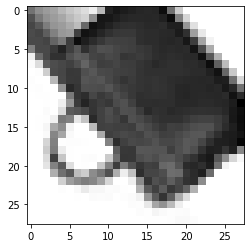

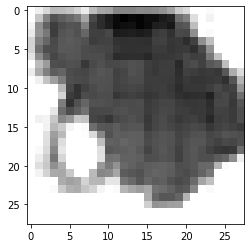

In [54]:

for X,Y in rotateDataset(x_test, batch_size=1, maxRot=360):
    print(np.argmax(Y), np.argmax(model.predict(X)))
    plt.figure(0)  
    get_layer_output = K.function([model.input], model.layers[0].output)
    layer_out = np.array(get_layer_output([X]))
    print(layer_out[0].shape)
    plt.imshow(layer_out[0], cmap='gray_r')   
    plt.figure(1)  
    get_layer_output = K.function([model.input], model.layers[-1].output)
    layer_out = np.array(get_layer_output([X]))
    print(layer_out[0].shape)
    plt.imshow(layer_out[0],  cmap='gray_r')   

    break

In [13]:
np.sum(layer_out[0][0])

0.0